In [ ]:
# https://www.kaggle.com/c/titanic


pandas的DataFrame主要关注表格型数据处理，numpy主要关注数值运算。如果你想在pandas的数据上搞一些复杂运算，比如求指数、求对数、矩阵乘法之类的，这个时候就建议先转成numpy对象。

另外要注意，pandas要依赖numpy的，也就意味着pandas很多对象内部其实是用numpy在实现。

读入数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data_dir = './titanic_data/'
dataset = pd.read_csv(data_dir +'train.csv')
testset = pd.read_csv(data_dir +'test.csv')
print(dataset.shape)
print(testset.shape)

(891, 12)
(418, 11)


查看读入数据

In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
print(dataset.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [18]:
print(dataset.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


仔细查看读入数据

0    468
1    109
Name: Survived, dtype: int64
1    233
0     81
Name: Survived, dtype: int64


<Figure size 432x288 with 0 Axes>

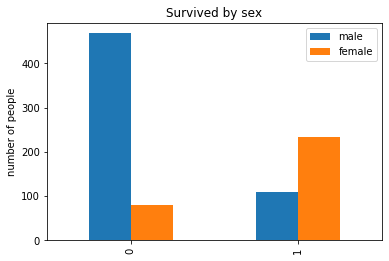

<Figure size 432x288 with 0 Axes>

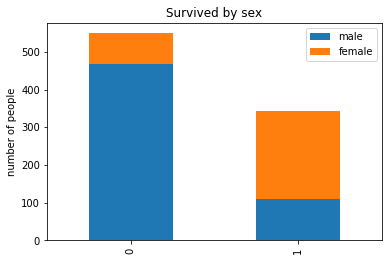

In [5]:
#观察年龄
Survived_male = dataset.Survived[dataset.Sex == 'male'].value_counts()  # pandas:Series.value_counts() 
Survived_female = dataset.Survived[dataset.Sex == 'female'].value_counts()
print(Survived_male)
print(Survived_female)
df = pd.DataFrame({'male':Survived_male,'female':Survived_female})
plt.figure()
df.plot(kind = 'bar')
plt.title('Survived by sex')
plt.ylabel('number of people')
plt.show()

plt.figure()
df.plot(kind = 'bar',stacked = True)
plt.title('Survived by sex')
plt.ylabel('number of people')
plt.show()

看看年龄

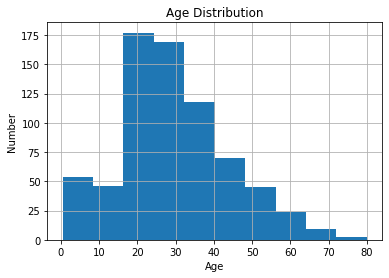

In [7]:
dataset['Age'].hist()
plt.ylabel("Number")
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

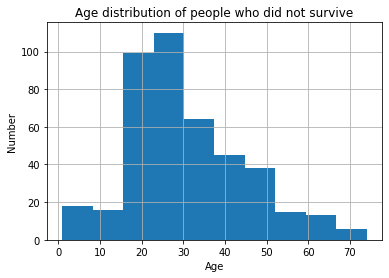

In [10]:
dataset[dataset.Survived==0]["Age"].hist()
plt.ylabel("Number")
plt.xlabel("Age")
plt.title("Age distribution of people who did not survive")
plt.show()

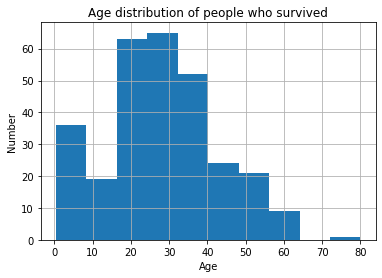

In [12]:
dataset[dataset.Survived==1]["Age"].hist()
plt.ylabel("Number")
plt.xlabel("Age")
plt.title("Age distribution of people who survived")
plt.show()

看看船票价钱

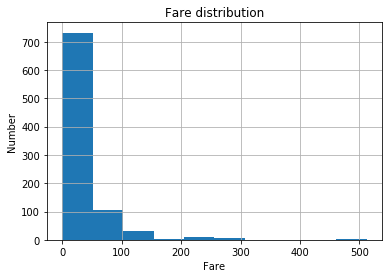

In [15]:
dataset['Fare'].hist()
plt.ylabel("Number")
plt.xlabel("Fare")
plt.title("Fare distribution")
plt.show()

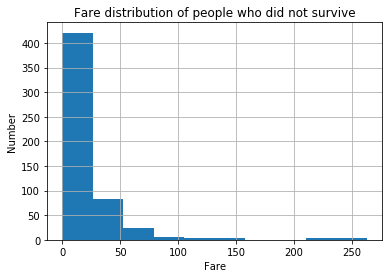

In [16]:
dataset[dataset.Survived==0]['Fare'].hist()
plt.ylabel("Number")
plt.xlabel("Fare")
plt.title("Fare distribution of people who did not survive")
plt.show()

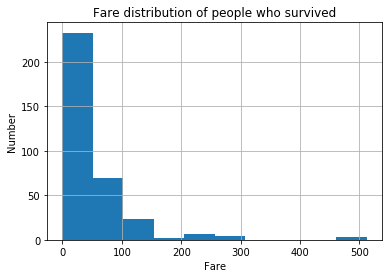

In [17]:
dataset[dataset.Survived==1]['Fare'].hist()
plt.ylabel("Number")
plt.xlabel("Fare")
plt.title("Fare distribution of people who survived")
plt.show()

查看乘客舱层

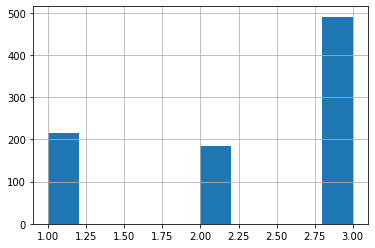

False
False
1    136
0     80
Name: Survived, dtype: int64
0    97
1    87
Name: Survived, dtype: int64
0    372
1    119
Name: Survived, dtype: int64


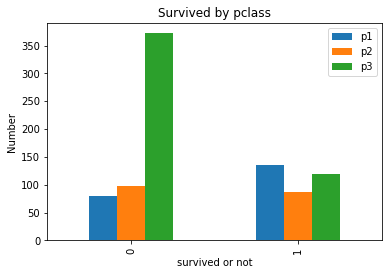

In [29]:
dataset['Pclass'].hist()
plt.show()
### any()的作用是把每个数据都“或”了一遍。也即，只要有一个是true，就会反会true。
### values的作用是把pandas的对象转换成numpy的。
print(dataset['Pclass'].isnull().values.any())
#pandas对象也有any的用法， 不用value转换成numpy的对象也可以
print(dataset['Pclass'].isnull().any())
Survived_p1 = dataset.Survived[dataset.Pclass == 1].value_counts()
print(Survived_p1)
Survived_p2 = dataset.Survived[dataset.Pclass == 2].value_counts()
print(Survived_p2)
Survived_p3 = dataset.Survived[dataset.Pclass == 3].value_counts()
print(Survived_p3)
df = pd.DataFrame({'p1':Survived_p1,'p2':Survived_p2,'p3':Survived_p3})
df.plot(kind='bar')
plt.xlabel('survived or not')
plt.ylabel('Number')
plt.title('Survived by pclass')
plt.show()

观察登船地点

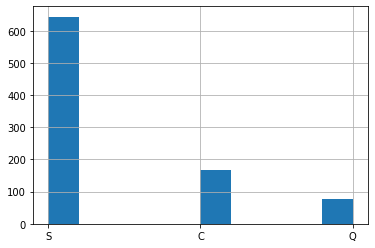

In [30]:
dataset['Embarked'].hist()

0    427
1    217
Name: Survived, dtype: int64
1    93
0    75
Name: Survived, dtype: int64
0    47
1    30
Name: Survived, dtype: int64


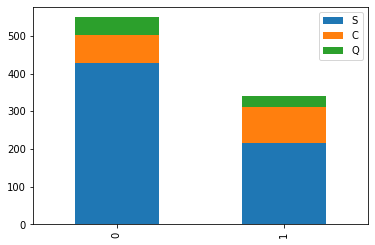

In [40]:
S = dataset.Survived[dataset.Embarked == 'S'].value_counts()
C = dataset.Survived[dataset.Embarked == 'C'].value_counts()
Q = dataset.Survived[dataset.Embarked == 'Q'].value_counts()
df = pd.DataFrame({'S':S,'C':C,'Q':Q })
df.plot(kind = 'bar', stacked = True)
print(S)
print(C)
print(Q)


保留下有效数据

分离label和训练数据

In [43]:
label = dataset.loc[:,'Survived']
data = dataset.loc[:,['Pclass', 'Sex', 'Age', 'Fare','Embarked']]
testdata = testset.loc[:,['Pclass', 'Sex', 'Age', 'Fare','Embarked']]
print(data)
print(label)
print(testdata)

     Pclass     Sex   Age     Fare Embarked
0         3    male  22.0   7.2500        S
1         1  female  38.0  71.2833        C
2         3  female  26.0   7.9250        S
3         1  female  35.0  53.1000        S
4         3    male  35.0   8.0500        S
..      ...     ...   ...      ...      ...
886       2    male  27.0  13.0000        S
887       1  female  19.0  30.0000        S
888       3  female   NaN  23.4500        S
889       1    male  26.0  30.0000        C
890       3    male  32.0   7.7500        Q

[891 rows x 5 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     Pclass     Sex   Age      Fare Embarked
0         3    male  34.5    7.8292        Q
1         3  female  47.0    7.0000        S
2         2    male  62.0    9.6875        Q
3         3    male  27.0    8.6625        S
4         3  female  22.0   12.2875        S
..      ...     ...   ...       ...  

In [75]:
#处理空数据
def fill_NaN(data):
    data_copy = data.copy(deep = True)
    #print(id(data_copy))
    #print(id(data))
    data_copy.loc[:,'Age'] = data_copy['Age'].fillna(data_copy['Age'].median())
    data_copy.loc[:,'Fare'] = data_copy['Fare'].fillna(data_copy['Fare'].median())
    data_copy.loc[:,'Pclass'] = data_copy['Pclass'].fillna(data_copy['Pclass'].median())
    data_copy.loc[:,'Sex'] = data_copy['Sex'].fillna('female')
    data_copy.loc[:,'Embarked'] = data_copy['Embarked'].fillna('S')

    return data_copy
    

In [76]:
data_no_nan = fill_NaN(data)
testdata_no_nan = fill_NaN(testdata)
#print(data.isnull().any())
print(data_no_nan.isnull().any())
print(testdata_no_nan.isnull().any())
print(data_no_nan)

Pclass      False
Sex         False
Age         False
Fare        False
Embarked    False
dtype: bool
Pclass      False
Sex         False
Age         False
Fare        False
Embarked    False
dtype: bool
     Pclass     Sex   Age     Fare Embarked
0         3    male  22.0   7.2500        S
1         1  female  38.0  71.2833        C
2         3  female  26.0   7.9250        S
3         1  female  35.0  53.1000        S
4         3    male  35.0   8.0500        S
..      ...     ...   ...      ...      ...
886       2    male  27.0  13.0000        S
887       1  female  19.0  30.0000        S
888       3  female  28.0  23.4500        S
889       1    male  26.0  30.0000        C
890       3    male  32.0   7.7500        Q

[891 rows x 5 columns]


In [78]:
######****************************
print(data_no_nan['Sex'].isnull().values.any())

def transfer_sex(data):
    data_copy = data.copy(deep = True)
    data_copy.loc[data_copy['Sex'] =='female', 'Sex'] = 0
    data_copy.loc[data_copy['Sex'] =='male','Sex' ] = 1
    return data_copy

data_after_sex = transfer_sex(data_no_nan)
testdata_after_sex = transfer_sex(testdata_no_nan)
print(data_after_sex)
print(testdata_after_sex)


False
     Pclass  Sex   Age     Fare Embarked
0         3    1  22.0   7.2500        S
1         1    0  38.0  71.2833        C
2         3    0  26.0   7.9250        S
3         1    0  35.0  53.1000        S
4         3    1  35.0   8.0500        S
..      ...  ...   ...      ...      ...
886       2    1  27.0  13.0000        S
887       1    0  19.0  30.0000        S
888       3    0  28.0  23.4500        S
889       1    1  26.0  30.0000        C
890       3    1  32.0   7.7500        Q

[891 rows x 5 columns]
     Pclass  Sex   Age      Fare Embarked
0         3    1  34.5    7.8292        Q
1         3    0  47.0    7.0000        S
2         2    1  62.0    9.6875        Q
3         3    1  27.0    8.6625        S
4         3    0  22.0   12.2875        S
..      ...  ...   ...       ...      ...
413       3    1  27.0    8.0500        S
414       1    0  39.0  108.9000        C
415       3    1  38.5    7.2500        S
416       3    1  27.0    8.0500        S
417       3    1

In [82]:
print(data_after_sex.loc[:,'Embarked'].isnull().any())

def transfer_embark(data):
    data_copy = data.copy(deep = True)
    data_copy.loc[data_copy['Embarked'] == 'S', 'Embarked'] = 0
    data_copy.loc[data_copy['Embarked'] == 'C', 'Embarked'] = 1
    data_copy.loc[data_copy['Embarked'] == 'Q', 'Embarked'] = 2
    return data_copy

data_after_embarked = transfer_embark(data_after_sex)
print(data_after_embarked)
testdata_after_embarked = transfer_embark(testdata_after_sex)
print(testdata_after_embarked)



False
     Pclass  Sex   Age     Fare  Embarked
0         3    1  22.0   7.2500         0
1         1    0  38.0  71.2833         1
2         3    0  26.0   7.9250         0
3         1    0  35.0  53.1000         0
4         3    1  35.0   8.0500         0
..      ...  ...   ...      ...       ...
886       2    1  27.0  13.0000         0
887       1    0  19.0  30.0000         0
888       3    0  28.0  23.4500         0
889       1    1  26.0  30.0000         1
890       3    1  32.0   7.7500         2

[891 rows x 5 columns]
     Pclass  Sex   Age      Fare  Embarked
0         3    1  34.5    7.8292         2
1         3    0  47.0    7.0000         0
2         2    1  62.0    9.6875         2
3         3    1  27.0    8.6625         0
4         3    0  22.0   12.2875         0
..      ...  ...   ...       ...       ...
413       3    1  27.0    8.0500         0
414       1    0  39.0  108.9000         1
415       3    1  38.5    7.2500         0
416       3    1  27.0    8.0500    

In [84]:
data_now = data_after_embarked
testdata_now = testdata_after_embarked

from sklearn.model_selection import train_test_split


train_data, val_data,train_labels, val_labels = train_test_split(data_now, label, test_size = 0.2, random_state = 0)

print(train_data.shape, val_data.shape, train_labels.shape, val_labels.shape)

(712, 5) (179, 5) (712,) (179,)


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(1, 41)
k_scores = []

for K in k_range:
    clf = KNeighborsClassifier(n_neighbors = K)
    clf.fit(train_data, train_labels)
    print('K=', K)
    predictions = clf.predict(val_data)
    score = accuracy_score(val_labels, predictions)
    print(score)
    k_scores.append(score)
    
    


K= 1
0.6703910614525139
K= 2
0.6871508379888268
K= 3
0.7039106145251397
K= 4
0.6983240223463687
K= 5
0.7318435754189944
K= 6
0.7150837988826816
K= 7
0.7430167597765364
K= 8
0.6983240223463687
K= 9
0.7318435754189944
K= 10
0.7374301675977654
K= 11
0.7318435754189944
K= 12
0.7262569832402235
K= 13
0.7262569832402235
K= 14
0.7206703910614525
K= 15
0.7318435754189944
K= 16
0.7039106145251397
K= 17
0.7374301675977654
K= 18
0.7262569832402235
K= 19
0.7374301675977654
K= 20
0.7374301675977654
K= 21
0.7597765363128491
K= 22
0.7486033519553073
K= 23
0.7541899441340782
K= 24
0.7430167597765364
K= 25
0.7597765363128491
K= 26
0.7430167597765364
K= 27
0.7541899441340782
K= 28
0.7541899441340782
K= 29
0.7597765363128491
K= 30
0.7541899441340782
K= 31
0.7541899441340782
K= 32
0.7541899441340782
K= 33
0.7653631284916201
K= 34
0.7597765363128491
K= 35
0.7653631284916201
K= 36
0.7541899441340782
K= 37
0.7374301675977654
K= 38
0.7541899441340782
K= 39
0.7541899441340782
K= 40
0.7486033519553073


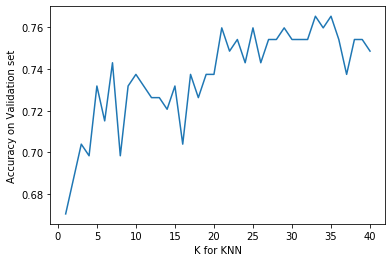

32
[34 32 28 33 20 24 22 37 38 35 31 30 29 27 26 21 39 23 25  6 16  9 19 36
 18  8 10 14  4 17 11 12 13  5 15  2  7  3  1  0]


In [98]:
plt.plot(k_range, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Accuracy on Validation set')
plt.show()
print(np.array(k_scores).argmax())
#按倒序排
print(np.array(k_scores).argsort()[:][::-1])

In [100]:
clf = KNeighborsClassifier(n_neighbors = 33)
clf.fit(data_now, label)
result = clf.predict(testdata_now)
print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 0]


In [102]:
df = pd.DataFrame({"PassengerId":testset['PassengerId'],"Survived":result})
df.to_csv('submission_titanic.csv', header = True, index = False)